In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from causal_nh.utils import open_pkl_file
from causal_nh.test import test_prediction
import os
from causal_nh.train_cuda import train_nh, train_causal_nh
from causal_nh.model.NeuralHawkesCuda import CausalNeuralHawkesMasked, CausalNeuralHawkesMaskedWeighted, CausalNeuralHawkesTrainableWeighted
import pickle
%matplotlib inline

In [4]:
data_path = "../../data"
results = "../../results"
artifacts = "../../artefacts"
if not os.path.exists(results):
    os.mkdir(results)
if not os.path.exists(artifacts):
    os.mkdir(artifacts)

datasets = [item for item in os.listdir(data_path) if os.path.isdir(f'{data_path}/{item}')]
print(datasets)
datasets = [datasets[5]]
print(datasets)

['data_synth_10_events_small', 'data_synth_2_events_small', 'data_synth_3_events', 'data_synth_3_events_small', 'data_synth_5_events', 'data_synth_5_events_small']
['data_synth_5_events_small']


../../data/data_synth_5_events_small/
Processing data...
You are using GPU acceleration.
Number of GPU:  6
start training...
Epoch 0, process 0 out of 6 is done
Epoch 0, process 1 out of 6 is done
Epoch 0, process 2 out of 6 is done
Epoch 0, process 3 out of 6 is done
Epoch 0, process 4 out of 6 is done
Epoch 0, process 5 out of 6 is done
The log-likelihood at epoch 0: -1.1556666226293046

validating on log likelihood...

validating on type prediction accuracy if we know when next event will happen...


Epoch 1, process 0 out of 6 is done
Epoch 1, process 1 out of 6 is done
Epoch 1, process 2 out of 6 is done
Epoch 1, process 3 out of 6 is done
Epoch 1, process 4 out of 6 is done
Epoch 1, process 5 out of 6 is done
The log-likelihood at epoch 1: -0.6366527070320868

validating on log likelihood...

validating on type prediction accuracy if we know when next event will happen...


Epoch 2, process 0 out of 6 is done
Epoch 2, process 1 out of 6 is done
Epoch 2, process 2 out of 6 is done

Epoch 21, process 0 out of 6 is done
Epoch 21, process 1 out of 6 is done
Epoch 21, process 2 out of 6 is done
Epoch 21, process 3 out of 6 is done
Epoch 21, process 4 out of 6 is done
Epoch 21, process 5 out of 6 is done
The log-likelihood at epoch 21: -0.41735034409811483

validating on log likelihood...

validating on type prediction accuracy if we know when next event will happen...


Epoch 22, process 0 out of 6 is done
Epoch 22, process 1 out of 6 is done
Epoch 22, process 2 out of 6 is done
Epoch 22, process 3 out of 6 is done
Epoch 22, process 4 out of 6 is done
Epoch 22, process 5 out of 6 is done
The log-likelihood at epoch 22: -0.414610275708754

validating on log likelihood...

validating on type prediction accuracy if we know when next event will happen...


Epoch 23, process 0 out of 6 is done
Epoch 23, process 1 out of 6 is done
Epoch 23, process 2 out of 6 is done
Epoch 23, process 3 out of 6 is done
Epoch 23, process 4 out of 6 is done
Epoch 23, process 5 out of 6 is d

Epoch 42, process 0 out of 6 is done
Epoch 42, process 1 out of 6 is done
Epoch 42, process 2 out of 6 is done
Epoch 42, process 3 out of 6 is done
Epoch 42, process 4 out of 6 is done
Epoch 42, process 5 out of 6 is done
The log-likelihood at epoch 42: -0.41487180420549485

validating on log likelihood...

validating on type prediction accuracy if we know when next event will happen...


Epoch 43, process 0 out of 6 is done
Epoch 43, process 1 out of 6 is done
Epoch 43, process 2 out of 6 is done
Epoch 43, process 3 out of 6 is done
Epoch 43, process 4 out of 6 is done
Epoch 43, process 5 out of 6 is done
The log-likelihood at epoch 43: -0.41119213044319924

validating on log likelihood...

validating on type prediction accuracy if we know when next event will happen...


Epoch 44, process 0 out of 6 is done
Epoch 44, process 1 out of 6 is done
Epoch 44, process 2 out of 6 is done
Epoch 44, process 3 out of 6 is done
Epoch 44, process 4 out of 6 is done
Epoch 44, process 5 out of 6 is

Epoch 63, process 0 out of 6 is done
Epoch 63, process 1 out of 6 is done
Epoch 63, process 2 out of 6 is done
Epoch 63, process 3 out of 6 is done
Epoch 63, process 4 out of 6 is done
Epoch 63, process 5 out of 6 is done
The log-likelihood at epoch 63: -0.4114519439060938

validating on log likelihood...

validating on type prediction accuracy if we know when next event will happen...


Epoch 64, process 0 out of 6 is done
Epoch 64, process 1 out of 6 is done
Epoch 64, process 2 out of 6 is done
Epoch 64, process 3 out of 6 is done
Epoch 64, process 4 out of 6 is done
Epoch 64, process 5 out of 6 is done
The log-likelihood at epoch 64: -0.4094139476123451

validating on log likelihood...

validating on type prediction accuracy if we know when next event will happen...


Epoch 65, process 0 out of 6 is done
Epoch 65, process 1 out of 6 is done
Epoch 65, process 2 out of 6 is done
Epoch 65, process 3 out of 6 is done
Epoch 65, process 4 out of 6 is done
Epoch 65, process 5 out of 6 is d

Epoch 84, process 0 out of 6 is done
Epoch 84, process 1 out of 6 is done
Epoch 84, process 2 out of 6 is done
Epoch 84, process 3 out of 6 is done
Epoch 84, process 4 out of 6 is done
Epoch 84, process 5 out of 6 is done
The log-likelihood at epoch 84: -0.40644763858275423

validating on log likelihood...

validating on type prediction accuracy if we know when next event will happen...


Epoch 85, process 0 out of 6 is done
Epoch 85, process 1 out of 6 is done
Epoch 85, process 2 out of 6 is done
Epoch 85, process 3 out of 6 is done
Epoch 85, process 4 out of 6 is done
Epoch 85, process 5 out of 6 is done
The log-likelihood at epoch 85: -0.40732158234854215

validating on log likelihood...

validating on type prediction accuracy if we know when next event will happen...


Epoch 86, process 0 out of 6 is done
Epoch 86, process 1 out of 6 is done
Epoch 86, process 2 out of 6 is done
Epoch 86, process 3 out of 6 is done
Epoch 86, process 4 out of 6 is done
Epoch 86, process 5 out of 6 is

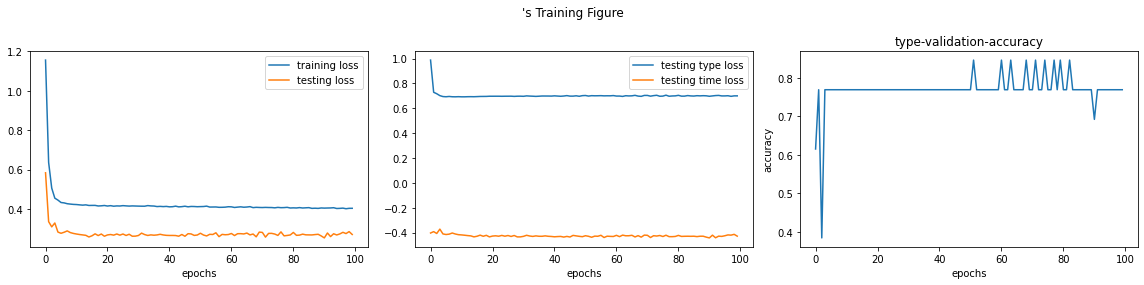

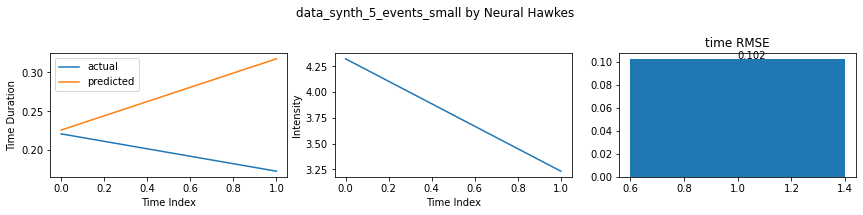

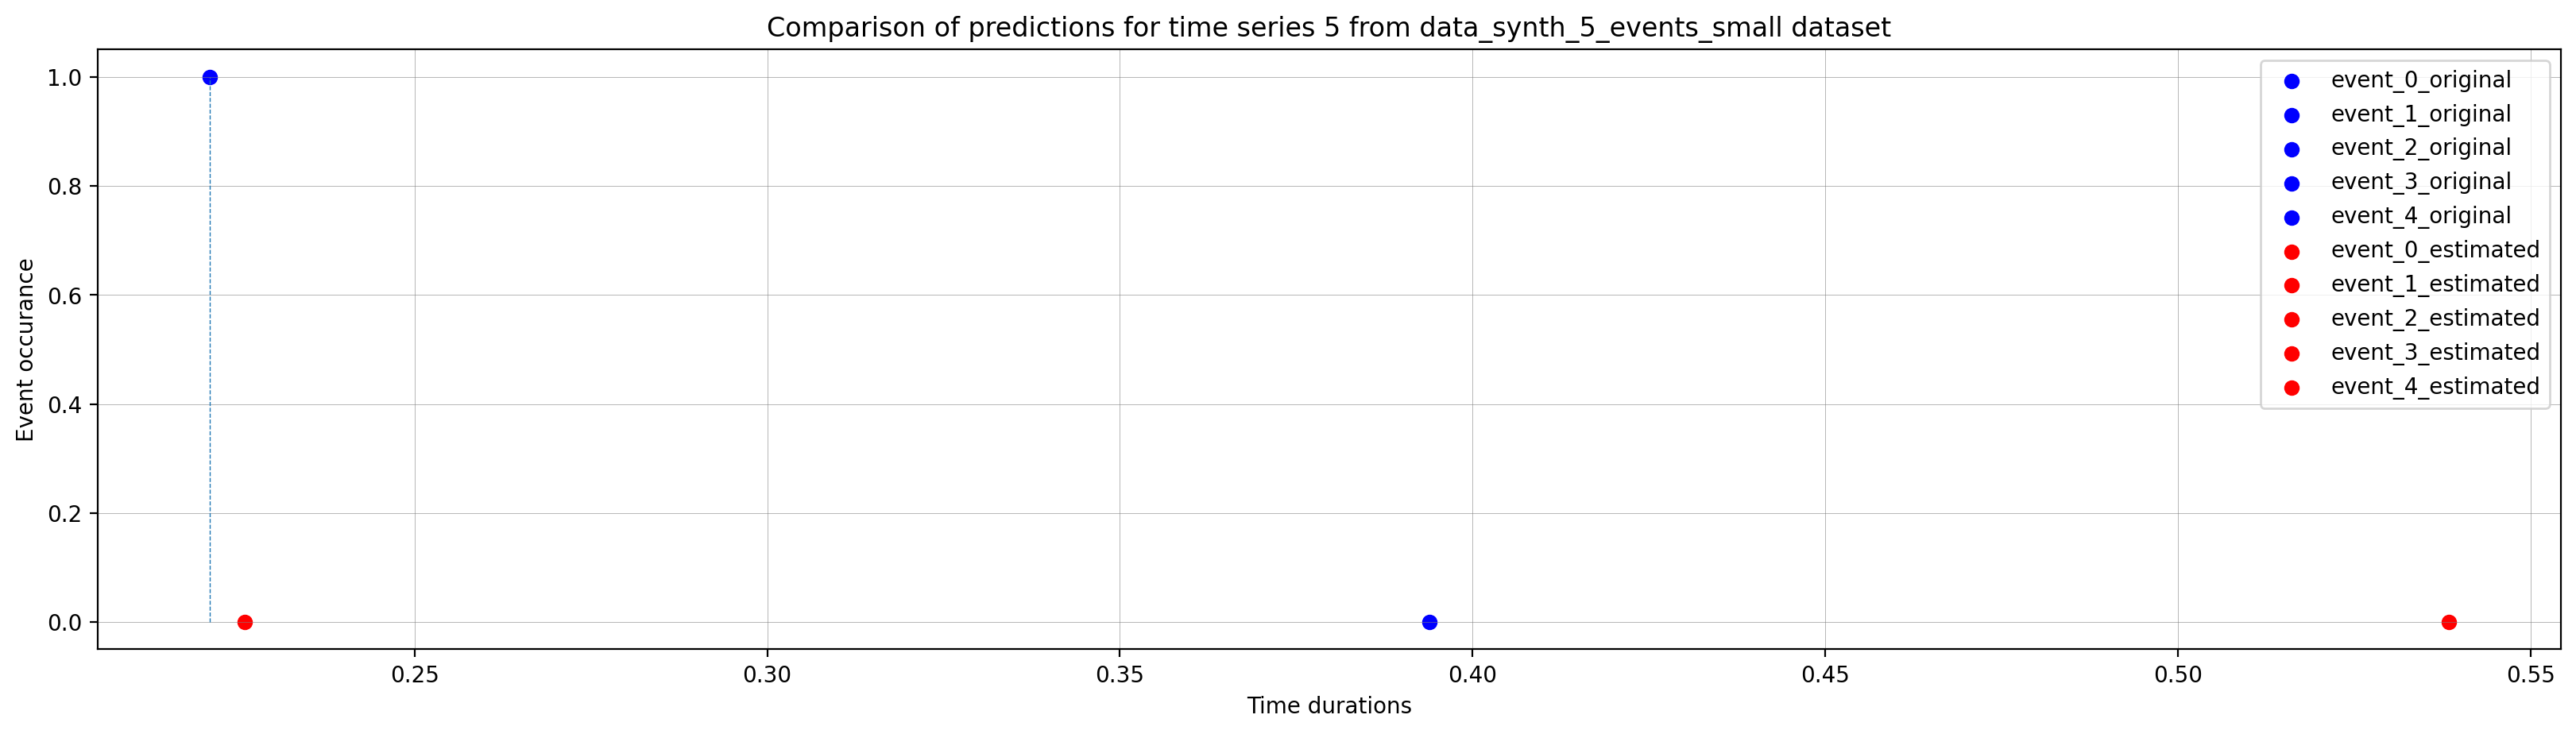

CausalNeuralHawkesMasked
Processing data...
You are using GPU acceleration.
Number of GPU:  6
start training...
tensor([[0., 0., 0., 1., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 1., 1., 0.],
        [1., 0., 1., 0., 1.],
        [0., 0., 0., 1., 0.]], device='cuda:0')
The log-likelihood at epoch 0: -1.192085712850179

validating on log likelihood...

validating on type prediction accuracy if we know when next event will happen...


The log-likelihood at epoch 1: -0.8463709291067507

validating on log likelihood...

validating on type prediction accuracy if we know when next event will happen...


The log-likelihood at epoch 2: -0.7998252417557037

validating on log likelihood...

validating on type prediction accuracy if we know when next event will happen...


The log-likelihood at epoch 3: -0.7761512239876218

validating on log likelihood...

validating on type prediction accuracy if we know when next event will happen...


The log-likelihood at epoch 4: -0.773256229421337

The log-likelihood at epoch 47: -0.7493863011795737

validating on log likelihood...

validating on type prediction accuracy if we know when next event will happen...


The log-likelihood at epoch 48: -0.7523102007127428

validating on log likelihood...

validating on type prediction accuracy if we know when next event will happen...


The log-likelihood at epoch 49: -0.7545927516803235

validating on log likelihood...

validating on type prediction accuracy if we know when next event will happen...


The log-likelihood at epoch 50: -0.7515602144504472

validating on log likelihood...

validating on type prediction accuracy if we know when next event will happen...


The log-likelihood at epoch 51: -0.7519413224290827

validating on log likelihood...

validating on type prediction accuracy if we know when next event will happen...


The log-likelihood at epoch 52: -0.7513470010939954

validating on log likelihood...

validating on type prediction accuracy if we know when next event wil

The log-likelihood at epoch 96: -0.7356307970323211

validating on log likelihood...

validating on type prediction accuracy if we know when next event will happen...


The log-likelihood at epoch 97: -0.7370666007047652

validating on log likelihood...

validating on type prediction accuracy if we know when next event will happen...


The log-likelihood at epoch 98: -0.73579737541506

validating on log likelihood...

validating on type prediction accuracy if we know when next event will happen...


The log-likelihood at epoch 99: -0.7372718773988681

validating on log likelihood...

validating on type prediction accuracy if we know when next event will happen...


Parameter containing:
tensor([[0., 0., 0., 1., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 1., 1., 0.],
        [1., 0., 1., 0., 1.],
        [0., 0., 0., 1., 0.]], device='cuda:0')
tensor([[0., 0., 0., 1., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 1., 1., 0.],
        [1., 0., 1., 0., 1.],
        [0., 0.,

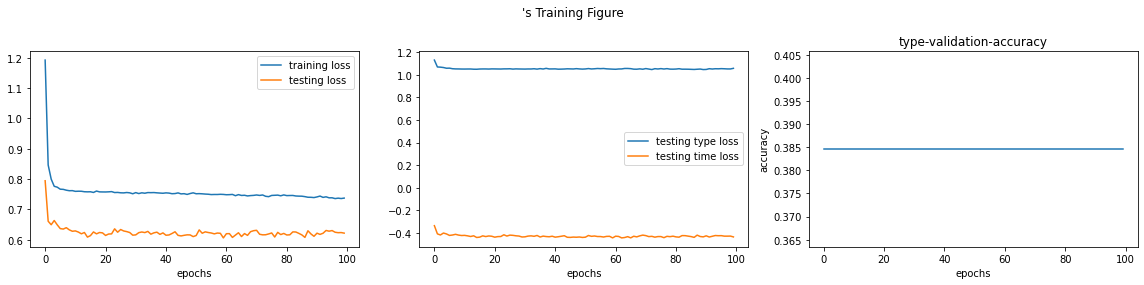

Saving training loss and validation data...
If you have a trained model before this, please combine the previous train_date file to generate plots that are able to show the whole training information
2021_12_23_24_36_data_synth_5_events_small_CausalNeuralHawkesMasked_model
You are using GPU acceleration.
Number of GPU:  6
prediction at event 10 on a sequence of length 12 is done
You are using GPU acceleration.
Number of GPU:  6
prediction at event 11 on a sequence of length 12 is done


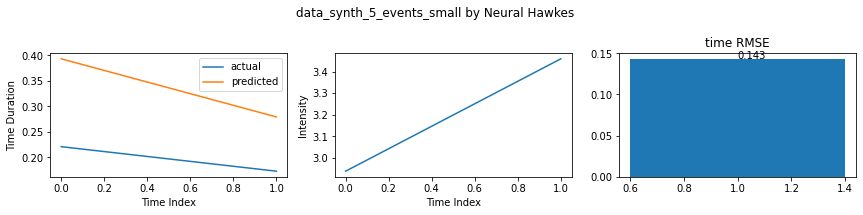

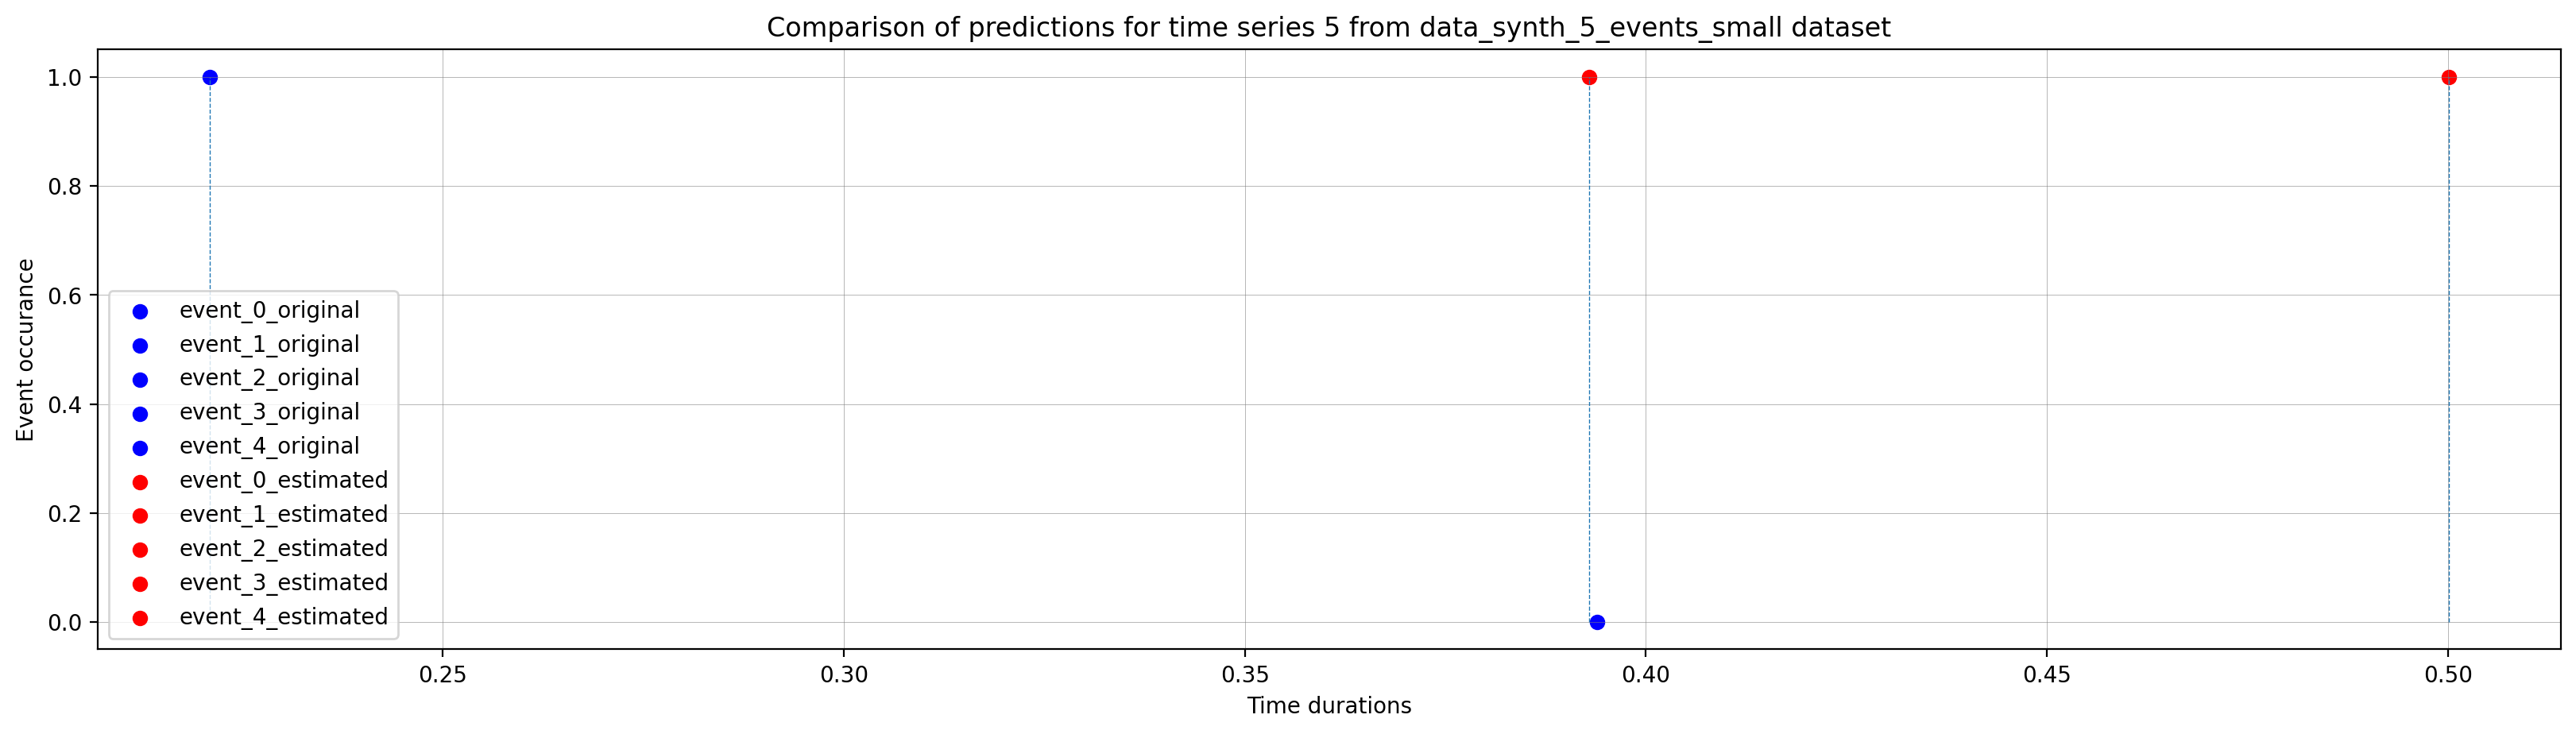

CausalNeuralHawkesMaskedWeighted
Processing data...
You are using GPU acceleration.
Number of GPU:  6
start training...
tensor([[0., 0., 0., 1., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 1., 1., 0.],
        [1., 0., 1., 0., 1.],
        [0., 0., 0., 1., 0.]], device='cuda:0')
The log-likelihood at epoch 0: -1.1478751737436068

validating on log likelihood...

validating on type prediction accuracy if we know when next event will happen...


The log-likelihood at epoch 1: -0.842890190553815

validating on log likelihood...

validating on type prediction accuracy if we know when next event will happen...


The log-likelihood at epoch 2: -0.7985370835383528

validating on log likelihood...

validating on type prediction accuracy if we know when next event will happen...


The log-likelihood at epoch 3: -0.7798669635823916

validating on log likelihood...

validating on type prediction accuracy if we know when next event will happen...


The log-likelihood at epoch 4: -0.7749377

The log-likelihood at epoch 47: -0.7510865425866047

validating on log likelihood...

validating on type prediction accuracy if we know when next event will happen...


The log-likelihood at epoch 48: -0.7485430275362174

validating on log likelihood...

validating on type prediction accuracy if we know when next event will happen...


The log-likelihood at epoch 49: -0.7461856165398056

validating on log likelihood...

validating on type prediction accuracy if we know when next event will happen...


The log-likelihood at epoch 50: -0.7452114468062139

validating on log likelihood...

validating on type prediction accuracy if we know when next event will happen...


The log-likelihood at epoch 51: -0.7477828861815151

validating on log likelihood...

validating on type prediction accuracy if we know when next event will happen...


The log-likelihood at epoch 52: -0.7454902324224328

validating on log likelihood...

validating on type prediction accuracy if we know when next event wil

In [ ]:
new_models = [CausalNeuralHawkesMasked, CausalNeuralHawkesMaskedWeighted, CausalNeuralHawkesTrainableWeighted]
for dataset in datasets:
    dataset_name = dataset
    path = f'{data_path}/{dataset_name}/'
    print(path)
    train = open_pkl_file(path + 'train.pkl', 'train')
    dev = open_pkl_file(path + 'dev.pkl', 'dev')
    test_data = open_pkl_file(path + 'test.pkl', 'test')
    with open(path + 'A.pkl', 'rb') as f:
        A = pickle.load(f)
    A = A['A']
    W = A
    A[A==0.2] = 1

    output_folder = f'{artifacts}/{dataset_name}'
    if not os.path.exists(output_folder):
        os.mkdir(output_folder)
    
    save_path, model_path = train_nh(train, dev, f'{output_folder}/', False, lr=0.01, num_epochs=100, batch_size=50)
    
    original_time, original_type, estimated_times, estimated_types, estimated_intensities, rmse, acc = test_prediction(
                test_data = test_data,
                idx_test_series=5,
                n_samples=1000,
                start_test_idx=10,
                path_to_save=save_path,
                path_to_model=model_path,
                dataset_name=dataset_name)
    
    fname = save_path+model_path.split('/')[-1].split('.')[0]+"_metrics.txt"
    with open(fname, 'w') as f:
        f.write(f"RMSE: {rmse}\n")
        f.write(f"Accuracy: {acc}")
    
    for m in new_models:
        print(m.__name__)
        save_path, model_path = train_causal_nh(train, dev, A,W,  f'{output_folder}/', False, lr=0.01, num_epochs=100, batch_size=50, dataset_name=dataset_name, model=m)
        
        original_time, original_type, estimated_times, estimated_types, estimated_intensities, rmse, acc = test_prediction(
                test_data = test_data,
                idx_test_series=5,
                n_samples=1000,
                start_test_idx=10,
                path_to_save=save_path,
                path_to_model=model_path,
                dataset_name=dataset_name)
        fname = save_path+model_path.split('/')[-1].split('.')[0]+"_metrics.txt"
        with open(fname, 'w') as f:
            f.write(f"RMSE: {rmse}\n")
            f.write(f"Accuracy: {acc}")
        
    
    

../../data/data_synth_10_events_small/


10

In [36]:
with open(path + 'A.pkl', 'rb') as f:
    A = pickle.load(f)

In [37]:
A = A['A']
W = A
A[A==0.2] = 1


In [41]:
A

array([[0., 0., 1., 0., 1., 1., 0., 0., 0., 1.],
       [0., 0., 1., 1., 0., 1., 0., 0., 1., 0.],
       [1., 0., 1., 0., 1., 1., 0., 0., 1., 1.],
       [0., 0., 0., 1., 0., 0., 1., 1., 0., 0.],
       [1., 1., 0., 0., 1., 0., 0., 0., 0., 1.],
       [1., 0., 1., 0., 0., 1., 1., 0., 0., 1.],
       [1., 1., 1., 1., 0., 1., 1., 1., 0., 0.],
       [0., 0., 1., 0., 1., 1., 1., 0., 1., 0.],
       [0., 0., 0., 1., 1., 0., 0., 0., 0., 1.],
       [0., 1., 0., 1., 0., 0., 1., 1., 1., 1.]])

Processing data...
You are using GPU acceleration.
Number of GPU:  6
start training...
tensor([[0., 0., 1., 0., 1., 1., 0., 0., 0., 1.],
        [0., 0., 1., 1., 0., 1., 0., 0., 1., 0.],
        [1., 0., 1., 0., 1., 1., 0., 0., 1., 1.],
        [0., 0., 0., 1., 0., 0., 1., 1., 0., 0.],
        [1., 1., 0., 0., 1., 0., 0., 0., 0., 1.],
        [1., 0., 1., 0., 0., 1., 1., 0., 0., 1.],
        [1., 1., 1., 1., 0., 1., 1., 1., 0., 0.],
        [0., 0., 1., 0., 1., 1., 1., 0., 1., 0.],
        [0., 0., 0., 1., 1., 0., 0., 0., 0., 1.],
        [0., 1., 0., 1., 0., 0., 1., 1., 1., 1.]], device='cuda:0')
The log-likelihood at epoch 0: 0.39860638657093567

validating on log likelihood...

validating on type prediction accuracy if we know when next event will happen...


The log-likelihood at epoch 1: 1.4323962526284608

validating on log likelihood...

validating on type prediction accuracy if we know when next event will happen...


The log-likelihood at epoch 2: 1.6526387109506715

validatin


validating on type prediction accuracy if we know when next event will happen...


The log-likelihood at epoch 46: 2.551870319700461

validating on log likelihood...

validating on type prediction accuracy if we know when next event will happen...


The log-likelihood at epoch 47: 2.5529283996126972

validating on log likelihood...

validating on type prediction accuracy if we know when next event will happen...


The log-likelihood at epoch 48: 2.553048517056311

validating on log likelihood...

validating on type prediction accuracy if we know when next event will happen...


The log-likelihood at epoch 49: 2.554778310689933

validating on log likelihood...

validating on type prediction accuracy if we know when next event will happen...


The log-likelihood at epoch 50: 2.556167710587136

validating on log likelihood...

validating on type prediction accuracy if we know when next event will happen...


The log-likelihood at epoch 51: 2.558543222375988

validating on log likelihood.


validating on type prediction accuracy if we know when next event will happen...


The log-likelihood at epoch 95: 2.5792504012939754

validating on log likelihood...

validating on type prediction accuracy if we know when next event will happen...


The log-likelihood at epoch 96: 2.5785671258570306

validating on log likelihood...

validating on type prediction accuracy if we know when next event will happen...


The log-likelihood at epoch 97: 2.580702933280413

validating on log likelihood...

validating on type prediction accuracy if we know when next event will happen...


The log-likelihood at epoch 98: 2.577609881666573

validating on log likelihood...

validating on type prediction accuracy if we know when next event will happen...


The log-likelihood at epoch 99: 2.5819485983688324

validating on log likelihood...

validating on type prediction accuracy if we know when next event will happen...


Parameter containing:
tensor([[0., 0., 1., 0., 1., 1., 0., 0., 0., 1.],
      

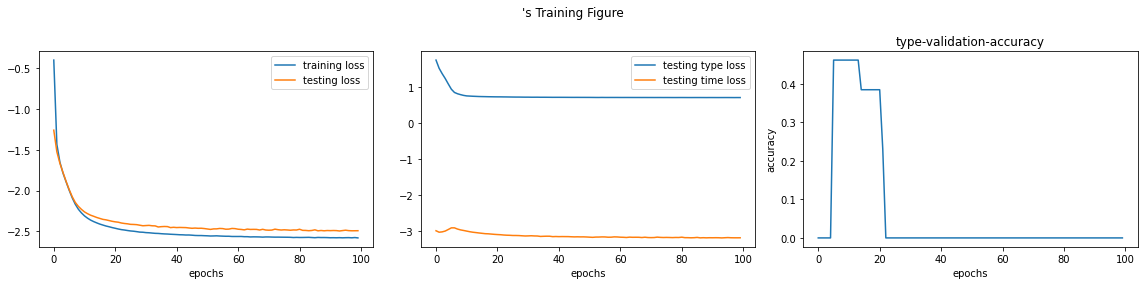

Saving training loss and validation data...
If you have a trained model before this, please combine the previous train_date file to generate plots that are able to show the whole training information


In [42]:
save_path, model_path = train_causal_nh(train, dev, A,W,  f'{output_folder}/', False, lr=0.01, num_epochs=100, batch_size=50, dataset_name=dataset_name, model=CausalNeuralHawkesMaskedWeighted)



In [47]:
print(save_path, model_path)
save_path = '../../artefacts/data_synth_10_events_small/2021_12_21_31_15_data_synth_10_events_small_CausalNeuralHawkesMasked'
model_path = '../../artefacts/data_synth_10_events_small/2021_12_21_31_15_data_synth_10_events_small_CausalNeuralHawkesMasked_model.pt'

../../artefacts/data_synth_10_events_small/2021_12_21_50_45_data_synth_10_events_small_CausalNeuralHawkesMaskedWeighted ../../artefacts/data_synth_10_events_small/2021_12_21_50_45_data_synth_10_events_small_CausalNeuralHawkesMaskedWeighted_model.pt


2021_12_21_31_15_data_synth_10_events_small_CausalNeuralHawkesMasked_model
You are using GPU acceleration.
Number of GPU:  6
prediction at event 10 on a sequence of length 86 is done
You are using GPU acceleration.
Number of GPU:  6
prediction at event 11 on a sequence of length 86 is done
You are using GPU acceleration.
Number of GPU:  6
prediction at event 12 on a sequence of length 86 is done
You are using GPU acceleration.
Number of GPU:  6
prediction at event 13 on a sequence of length 86 is done
You are using GPU acceleration.
Number of GPU:  6
prediction at event 14 on a sequence of length 86 is done
You are using GPU acceleration.
Number of GPU:  6
prediction at event 15 on a sequence of length 86 is done
You are using GPU acceleration.
Number of GPU:  6
prediction at event 16 on a sequence of length 86 is done
You are using GPU acceleration.
Number of GPU:  6
prediction at event 17 on a sequence of length 86 is done
You are using GPU acceleration.
Number of GPU:  6
prediction 

prediction at event 85 on a sequence of length 86 is done


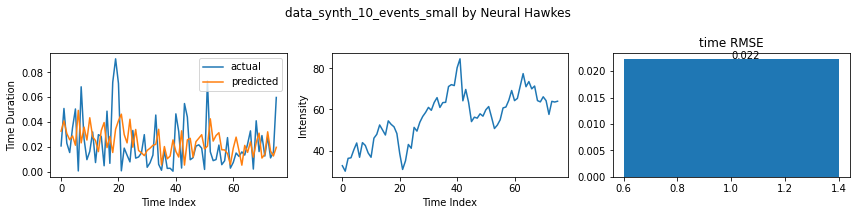

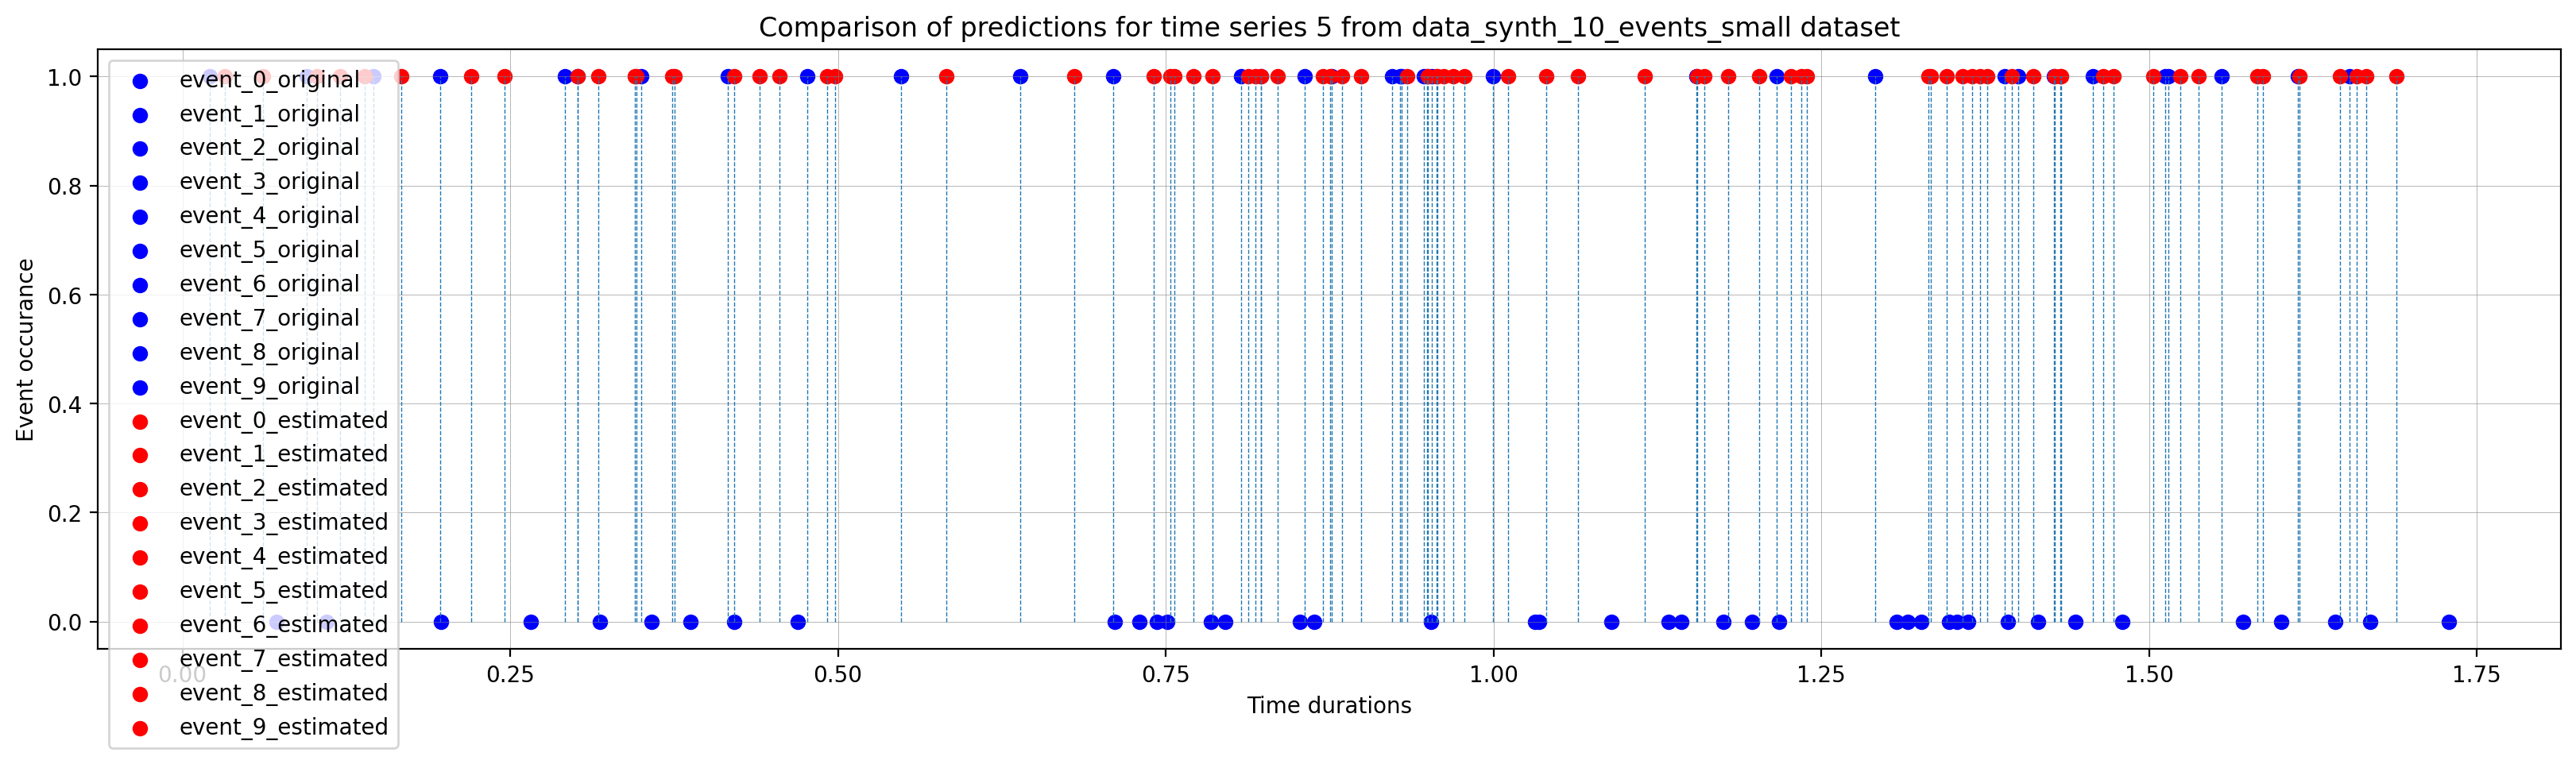

In [48]:
original_time, original_type, estimated_times, estimated_types, estimated_intensities, rmse, acc = test_prediction(
                test_data = test_data,
                idx_test_series=5,
                n_samples=1000,
                start_test_idx=10,
                path_to_save=save_path,
                path_to_model=model_path,
                dataset_name=dataset_name)
fname = save_path+model_path.split('/')[-1].split('.')[0]+"_metrics.txt"
with open(fname, 'w') as f:
    f.write(f"RMSE: {rmse}\n")
    f.write(f"Accuracy: {acc}")

